Compares model nowcasts to VENUS temperature and salinity data. Data is from the East and Central nodes.

In [1]:
import matplotlib.pyplot as plt
from nowcast import analyze
from nowcast.figures import figures
from nowcast.figures import research_VENUS
from salishsea_tools import tidetools, teos_tools, geo_tools
import datetime
from dateutil import tz
import numpy as np
import netCDF4 as nc
import matplotlib

%matplotlib inline

In [2]:

grid_B=nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy, X, Y = tidetools.get_bathy_data(grid_B)


In [3]:
T = nc.Dataset('/results/SalishSea/nowcast/01feb15/SalishSea_1d_20150201_20150201_grid_T.nc')
model_depths = T.variables['deptht'][:]

In [4]:
def truncate(data, t_o,t_f):
    sdt=t_o.replace(tzinfo=tz.tzutc()); edt=t_f.replace(tzinfo=tz.tzutc())
    data_trun = data[(data.date< edt) & (data.date >sdt)]
    return data_trun

In [5]:
data= research_VENUS.load_VENUS('East')

In [6]:
data[['sal','temp']]=data[['sal','temp']].astype(float)


In [7]:
t_o=datetime.datetime(2014,11,11); t_f = datetime.datetime(2016,6,22)
sdt=t_o.replace(tzinfo=tz.tzutc()); edt=t_f.replace(tzinfo=tz.tzutc())
data_trun =truncate(data ,sdt,edt)

In [8]:
def compare_temp_sal_timeseries(station,figsize=(15,8), nemo_36 = False):
    data= research_VENUS.load_VENUS(station)
    lon = research_VENUS.SITES['VENUS'][station]['lon']
    lat = research_VENUS.SITES['VENUS'][station]['lat']
    depth = research_VENUS.SITES['VENUS'][station]['depth']
    data[['sal','temp']]=data[['sal','temp']].astype(float)
    data_trun = truncate(data,t_o,t_f)
    
    k = tidetools.find_model_level(depth,model_depths)
    print (model_depths[k], depth)
    
    [j,i] = geo_tools.find_closest_model_point(lon,lat,X,Y, land_mask=bathy.mask)

    sal, time = analyze.combine_files(fnames,'vosaline',k,j,i) #consider interpolating ?
    temp, time = analyze.combine_files(fnames,'votemper',k,j,i) #consider interpolating ?
    if not nemo_36:
        sal = teos_tools.psu_teos(sal)
    
    fig,axs= plt.subplots(2,1,figsize=figsize)
    ax=axs[0]
    ax.plot(time,sal,label='model')
    ax.plot(data.date[:],teos_tools.psu_teos(data.sal[:].values),'-',label='obs')
    ax.set_xlim([t_o,t_f])
    ax.legend(loc=0)
    ax.set_title('Salinity comparison -  VENUS {}'.format(station))
    ax.set_ylabel('Salinty [g/kg]')
    print ('Observed Salinity: Mean {}, std {}'.format(data_trun.sal.mean(), data_trun.sal.std())  )  
    print( 'Modelled Salinity: Mean {}, std {}'.format(np.mean(sal), np.std(sal)))
    ax.grid()
    
    ax=axs[1]
    ax.plot(time,temp,label='model')
    ax.plot(data.date[:],data.temp[:],'-',label='obs')
    ax.set_xlim([t_o,t_f])
    ax.legend(loc=0)
    ax.set_title('Temp. comparison - VENUS {}'.format(station))
    ax.set_ylabel('Temperature (deg C)')
    print ('Observed Temperature: Mean {}, std {}'.format(data_trun.temp.mean(), data_trun.temp.std()) )   
    print( 'Modelled Temperature: Mean {}, std {}'.format(np.mean(temp), np.std(temp)))  
    ax.grid()
    
    
    return fig

In [9]:
font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

# Nowcasts

In [10]:
fnames = analyze.get_filenames(t_o, t_f, '1h', 'grid_T', '/results/SalishSea/nowcast/')

306.834 300
Observed Salinity: Mean 31.083786841492746, std 0.1238506748562403
Modelled Salinity: Mean 30.579748153686523, std 0.14033406972885132
Observed Temperature: Mean 9.593212113382474, std 0.3312978126336007
Modelled Temperature: Mean 10.044047355651855, std 0.37577372789382935


/home/nsoontie/anaconda3/envs/analysis/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


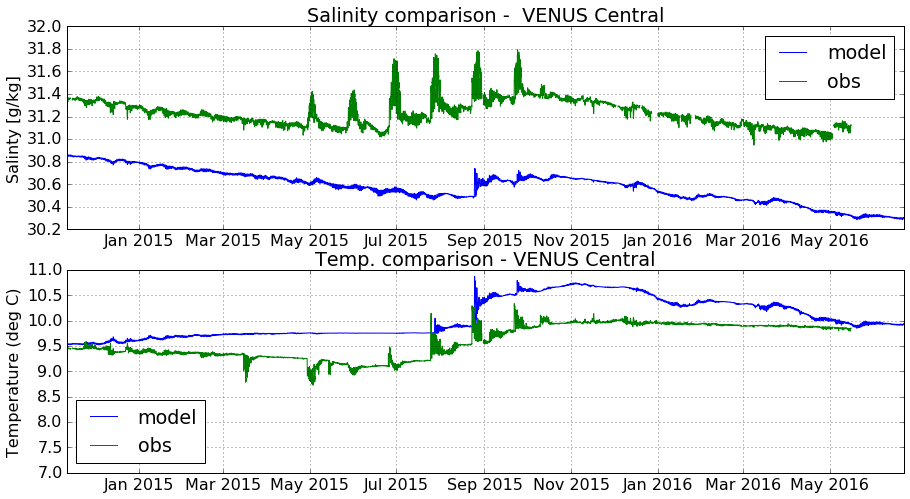

In [11]:

fig = compare_temp_sal_timeseries('Central')

173.114 170
Observed Salinity: Mean 30.686484348706763, std 0.3358957645450723
Modelled Salinity: Mean 30.332765579223633, std 0.19815078377723694
Observed Temperature: Mean 9.635474587098784, std 0.5594406659177835
Modelled Temperature: Mean 9.99721908569336, std 0.6032102704048157


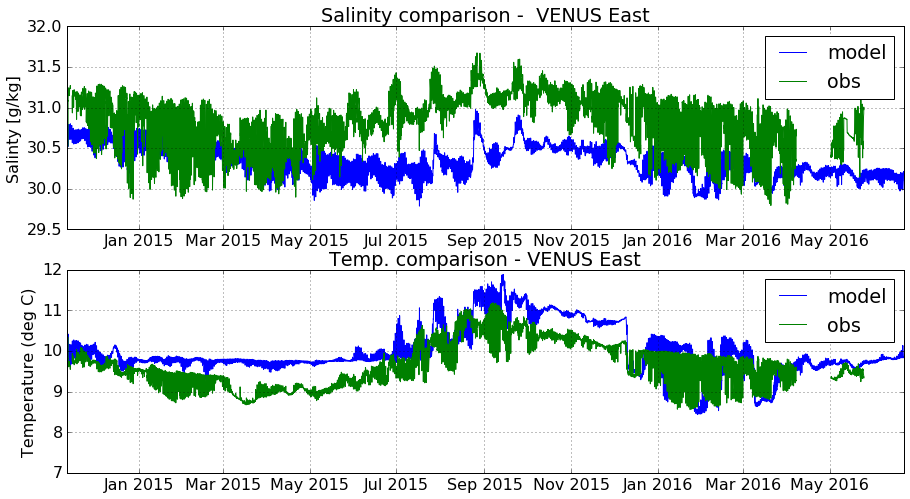

In [12]:
fig = compare_temp_sal_timeseries('East')

* I think we may have had multiple sims for a single day in early November. Just ignore that.
* Interpolate model to correct depth?

# Nowcast green

In [13]:
t_o=datetime.datetime(2015,12,5); t_f = datetime.datetime(2016,6,22)


fnames = analyze.get_filenames(t_o, t_f, '1h', 'grid_T', '/results/SalishSea/nowcast-green/')

306.834 300
Observed Salinity: Mean 30.994467095537914, std 0.07207721497942665
Modelled Salinity: Mean 31.10544204711914, std 0.04704761877655983
Observed Temperature: Mean 9.913266032399076, std 0.04086646395585413
Modelled Temperature: Mean 9.123209953308105, std 0.5690800547599792


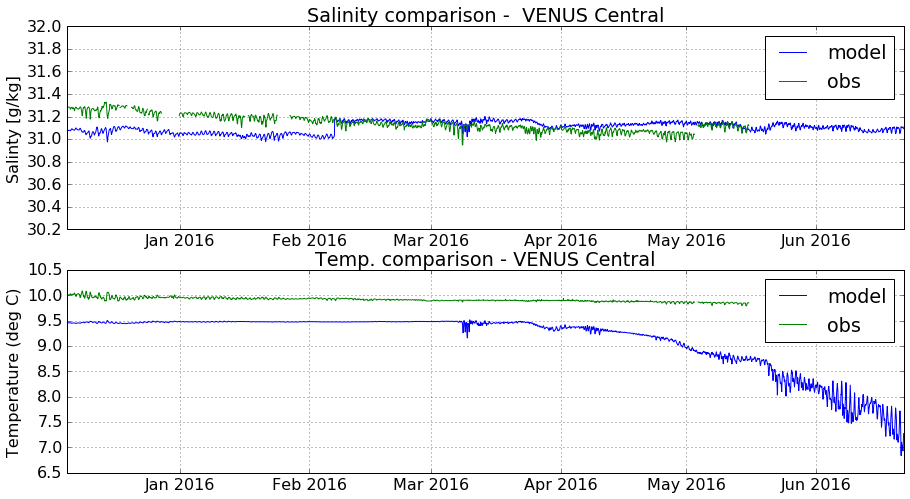

In [14]:
fig = compare_temp_sal_timeseries('Central', nemo_36 = True)

173.114 170
Observed Salinity: Mean 30.550141805359658, std 0.31161091495752763
Modelled Salinity: Mean 30.76064109802246, std 0.13253478705883026
Observed Temperature: Mean 9.507210239774329, std 0.38442988589151356
Modelled Temperature: Mean 8.772786140441895, std 0.44798755645751953


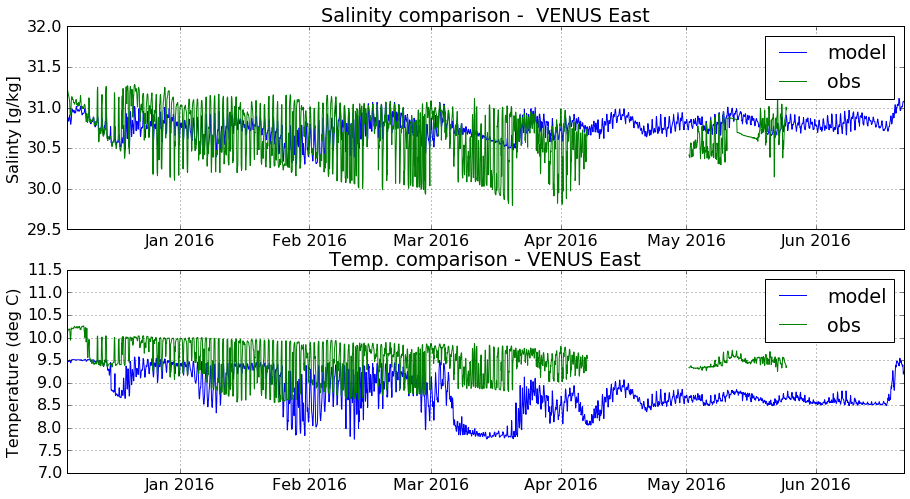

In [15]:
fig = compare_temp_sal_timeseries('East',  nemo_36 = True)

# Spectrum

In [16]:
t_o=datetime.datetime(2014,11,10); t_f = datetime.datetime(2015,3,9)
fnames = analyze.get_filenames(t_o, t_f, '1h', 'grid_T', '/results/SalishSea/nowcast/')

In [17]:
station = 'East'
data= research_VENUS.load_VENUS(station)
lon = research_VENUS.SITES['VENUS'][station]['lon']
lat = research_VENUS.SITES['VENUS'][station]['lat']
depth = research_VENUS.SITES['VENUS'][station]['depth']
    
k = tidetools.find_model_level(depth,model_depths)
print(model_depths[k], depth)
    
[j,i] = geo_tools.find_closest_model_point(lon,lat,X,Y,land_mask=bathy.mask)

sal, time = analyze.combine_files(fnames,'vosaline',k,j,i) #consider interpolating ?
temp, time = analyze.combine_files(fnames,'votemper',k,j,i) #consider interpolating ?

173.114 170


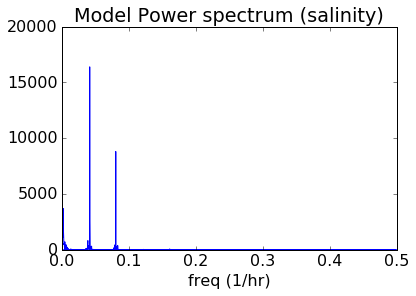

In [18]:
fig,ax=plt.subplots(1,1)

# model
ps = np.abs(np.fft.fft((sal)))**2
freqs = np.fft.fftfreq(sal.size, 1)
ax.plot(freqs,ps)
ax.set_ylim([0,2*10**4])
ax.set_xlim([0,.5])
ax.set_xlabel('freq (1/hr)')
ax.set_title('Model Power spectrum (salinity)')

* Strong signals at about 0.04 (1/24) and 0.08 (1/12) 
* Tidal frequencies
* Hard to do the fft on VENUS data because it contains NaNs. Will tackle this later..